# Finite Difference Method

Here are two examples of solving second order linear ordinary differential equations numerically using the Finite Difference Method. 

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Example 1

Compute the finite difference approximation to the boundary value problem

$$
y'' = \sin(t) \ , \ y(0) = 1, y(2\pi) = 0.
$$

Compare with the exact solution

$$
y(t) = 1 - \sin(t) - \frac{t}{2\pi}.
$$

First, let's try with $N=4$. 

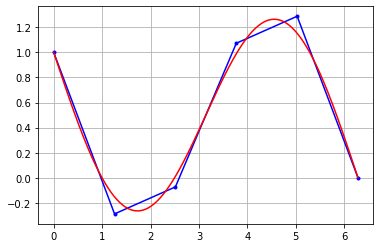

In [2]:
alpha = 1; beta = 0; t0 = 0; tf = 2*np.pi; 
N = 4; h = (tf - t0)/(N + 1) 
t = h*np.arange(1,N+1)

r = np.sin(t)

A = -2*np.diag(np.ones(N)) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)

b = np.array(h**2*r)
b[0] = b[0] - alpha
b[-1] = b[-1] - beta

y = la.solve(A,b)

T = np.hstack([t0,t,tf])
Y = np.hstack([alpha,y,beta])
plt.plot(T,Y,'b.-')

t_exact = np.arange(t0,tf,0.02)
y_exact = 1 - np.sin(t_exact) - 1/(2*np.pi)*t_exact
plt.plot(t_exact,y_exact,'r')

plt.grid(True)
plt.show()

Increasing the value of $N$ (i.e. decreasing $h$) will require more computations but gives a better approximation. 

For $N=40$:

In [2]:
alpha = 1; beta = 0; t0 = 0; tf = 2*np.pi; 
N = 40; h = (tf - t0)/(N + 1) 
t = h*np.arange(1,N+1)

r = np.sin(t)

A = -2*np.diag(np.ones(N)) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)

b = np.array(h**2*r)
b[0] = b[0] - alpha
b[-1] = b[-1] - beta

y = la.solve(A,b)

T = np.hstack([t0,t,tf])
Y = np.hstack([alpha,y,beta])
plt.plot(T,Y,'b.-')

t_exact = np.arange(t0,tf,0.02)
y_exact = 1 - np.sin(t_exact) - 1/(2*np.pi)*t_exact
plt.plot(t_exact,y_exact,'r')

plt.grid(True)
plt.show()

NameError: name 'np' is not defined

## General second order differential equation

Consider a general second order linear ordinary differential equation with boundary conditions

$$
y'' + p(t)y' + q(t)y = r(t) \ \ , \ \ y(t_0) = \alpha \ , \ \ y(t_f) = \beta.
$$

Using the notation
$$
a_k = 1 - \frac{h p_k}{2},
\hspace{10mm}
b_k = h^2q_k - 2,
\hspace{10mm}
c_k = 1 + \frac{h p_k}{2},
$$

the finite difference method yields the linear system $A \mathbf{y} = \mathbf{b}$ where

$$
A =
\left[ \begin{array}{rrcrr}
b_1 & c_1 & & & \\
a_2 & b_2 & c_2 & & \\
& & \ddots & & \\
& & a_{N-1} & b_{N-1} & c_{N-1} \\
& & & a_N & b_N
\end{array} \right]
\hspace{10mm}
\mathbf{b} = 
\begin{bmatrix}
h^2 r_1 - a_1 \alpha \\ h^2 r_2 \\ \vdots \\ h^2 r_{N-1} \\ h^2 r_N - c_N \beta
\end{bmatrix}
$$

## Example 2

Compute the finite difference approximation to the boundary value problem

$$
y''(t) + e^{-t^2} y'(t) + t^t y(t) = \frac{\sin(t)}{t} \ , \ y(1) = y(4) = 0.
$$

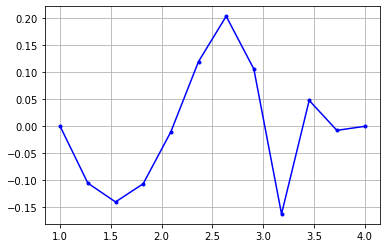

In [15]:
alpha = 0; beta = 0; t0 = 1; tf = 4;          # Boundary conditions
N = 10; h = (tf - t0)/(N + 1)                 # Discretize the domain
t = np.linspace(t0,tf,N+2)                    # Array of time points t0, t1, ..., tf

p = np.exp(-np.power(t,2))                    # Functions p, q and r evaluated at the time points t0, ..., tf
q = np.power(t,t)
r = np.sin(t)/t

a = 1 - h*p/2                                 # a_k, b_k and c_k defined as above
b = h**2*q - 2
c = 1 + h*p/2

A = np.diag(b[1:N+1]) + np.diag(a[2:N+1],-1) + np.diag(c[1:N],1)    # Form the matrix A

b = h**2*r[1:N+1]                             # Form the vector b
b[0] = b[0] - a[1]*alpha
b[-1] = b[-1] - c[N]*beta

y = la.solve(A,b)                             # Solve the system and obtain (approximate) values y1, ..., yN

y = np.concatenate([alpha,y,beta],axis=None)  # Add the known boundary values y0 and yN to the array
plt.plot(t,y,'b.-')                           # Plot the result
plt.grid(True)
plt.show()

The approximation seems quite rough, so let's increase $N$ to 50 for a better result:

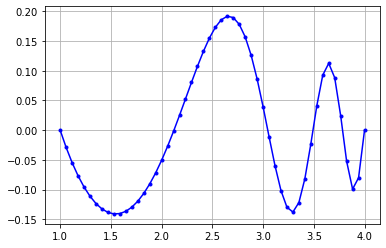

In [13]:
alpha = 0; beta = 0; t0 = 1; tf = 4;          # Boundary conditions
N = 50; h = (tf - t0)/(N + 1)                 # Discretize the domain
t = np.linspace(t0,tf,N+2)                    # Array of time points t0, t1, ..., tf

p = np.exp(-np.power(t,2))                    # Functions p, q and r evaluated at the time points t0, ..., tf
q = np.power(t,t)
r = np.sin(t)/t

a = 1 - h*p/2                                 # a_k, b_k and c_k defined as above
b = h**2*q - 2
c = 1 + h*p/2

A = np.diag(b[1:N+1]) + np.diag(a[2:N+1],-1) + np.diag(c[1:N],1)    # Form the matrix A

b = h**2*r[1:N+1]                             # Form the vector b
b[0] = b[0] - a[1]*alpha
b[-1] = b[-1] - c[N]*beta

y = la.solve(A,b)                             # Solve the system and obtain (approximate) values y1, ..., yN

y = np.concatenate([alpha,y,beta],axis=None)  # Add the known values y0 and yN to the array
plt.plot(t,y,'b.-')                           # Plot the result
plt.grid(True)
plt.show()

Now it looks much better, but towards the right end the curve is still not so smooth. Let's try $N=150$ (might take a few seconds). 

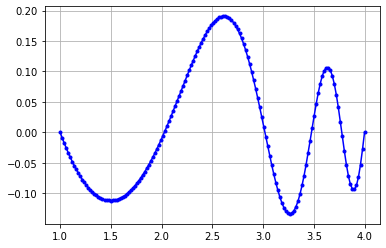

In [14]:
alpha = 0; beta = 0; t0 = 1; tf = 4;          # Boundary conditions
N = 150; h = (tf - t0)/(N + 1)                 # Discretize the domain
t = np.linspace(t0,tf,N+2)                    # Array of time points t0, t1, ..., tf

p = np.exp(-np.power(t,2))                    # Functions p, q and r evaluated at the time points t0, ..., tf
q = np.power(t,t)
r = np.sin(t)/t

a = 1 - h*p/2                                 # a_k, b_k and c_k defined as above
b = h**2*q - 2
c = 1 + h*p/2

A = np.diag(b[1:N+1]) + np.diag(a[2:N+1],-1) + np.diag(c[1:N],1)    # Form the matrix A

b = h**2*r[1:N+1]                             # Form the vector b
b[0] = b[0] - a[1]*alpha
b[-1] = b[-1] - c[N]*beta

y = la.solve(A,b)                             # Solve the system and obtain (approximate) values y1, ..., yN

y = np.concatenate([alpha,y,beta],axis=None)  # Add the known values y0 and yN to the array
plt.plot(t,y,'b.-')                           # Plot the result
plt.grid(True)
plt.show()

This looks like a fairly good result. Increasing $N$ further would still continue to improve the approximation, but would also require a longer computation time. 

To conclude:  
With some linear algebra, and a few lines of Python code, we can obtain a numerical solution to the *very* difficult (in fact, impossible to solve in terms of elementary functions) differential equation above. 